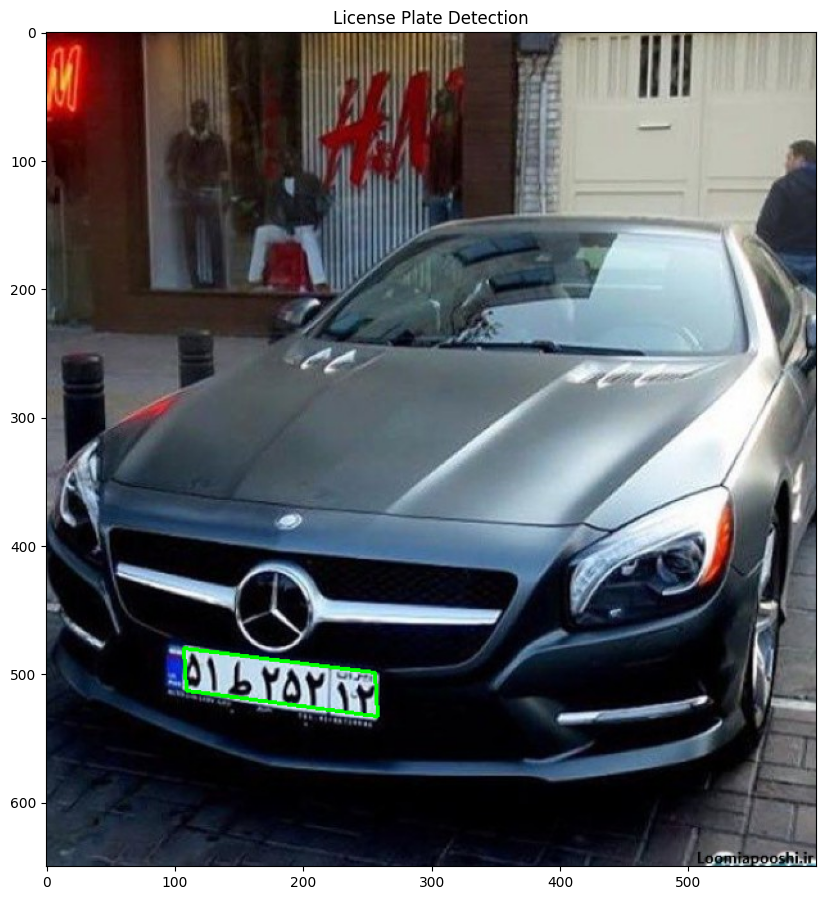

Detected Numbers: 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title="Image", image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size, size * aspect_ratio))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def detect_and_read_license_plate(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read image.")
        return
    
    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 200)
    
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    plate = None
    
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) == 4:
            plate = approx
            break
    
    if plate is not None:
        x, y, w, h = cv2.boundingRect(plate)
        plate_roi = gray[y:y+h, x:x+w]        
        cv2.drawContours(output, [plate], -1, (0, 255, 0), 2)
        imshow("License Plate Detection", output)
        
    else:
        print("No license plate detected.")
        imshow("Original Image", image)

if __name__ == "__main__":
    image_path = ""
    detect_and_read_license_plate(image_path)